In [1]:
# import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# data cleaning
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [6]:
dataset.info()   # full information of the dataset, non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.corr()# relationship between the variables

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [8]:
# Feature engineering
X = dataset.iloc[:, :-1].values   # Independent variable
y = dataset.iloc[:, 4].values     # Dependent variable

In [9]:
# Predictive modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
from sklearn.preprocessing import StandardScaler  # z score , standard normal distribution
scaler = StandardScaler()
#scaler.fit(X_train)    # scaler.fit_transform(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
y_pred = classifier.predict(X_test)  # independent test data

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))


[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [15]:
# Calculating accuaracy for different values of K's

Ks = 25
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_hat)
    print('Accuracy at k =', n, 'is', mean_acc[n-1])


Accuracy at k = 1 is 1.0
Accuracy at k = 2 is 1.0
Accuracy at k = 3 is 1.0
Accuracy at k = 4 is 0.9666666666666667
Accuracy at k = 5 is 1.0
Accuracy at k = 6 is 0.9666666666666667
Accuracy at k = 7 is 0.9666666666666667
Accuracy at k = 8 is 0.9666666666666667
Accuracy at k = 9 is 1.0
Accuracy at k = 10 is 1.0
Accuracy at k = 11 is 1.0
Accuracy at k = 12 is 1.0
Accuracy at k = 13 is 1.0
Accuracy at k = 14 is 1.0
Accuracy at k = 15 is 1.0
Accuracy at k = 16 is 1.0
Accuracy at k = 17 is 1.0
Accuracy at k = 18 is 1.0
Accuracy at k = 19 is 1.0
Accuracy at k = 20 is 1.0
Accuracy at k = 21 is 1.0
Accuracy at k = 22 is 0.9666666666666667
Accuracy at k = 23 is 1.0
Accuracy at k = 24 is 1.0


In [ ]:
mean_acc

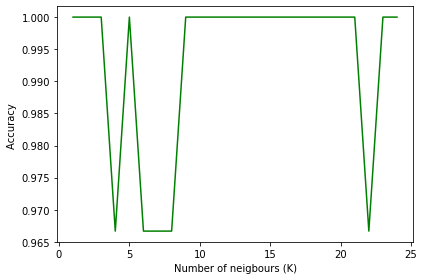

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of neigbours (K)')
plt.tight_layout()
plt.show()

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [19]:
error

[0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333]

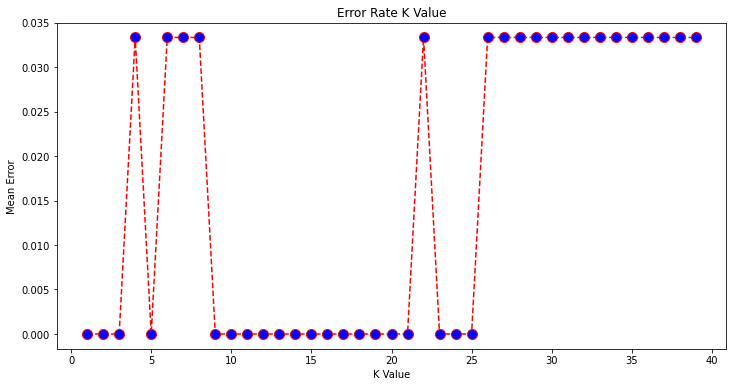

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');